Sharpe Ratio: A measure for calculating risk-adjusted return, it has become the industry standard for such calculations. Developed by William Sharpe.

S = (Rp - Rf) / Sigp

Rp: Expected Portfolio Return

Rf: Risk-Free Return

Sigp: Portfolio Standard Deviation

Sharpe Ratio was originally thought of as a yearly metric. ie, mean yearly return vs. mean daily return.

Annualized Sharpe Ratio can be obtained by multiplying against a K-Factor based off your Sampling Rate:

Daily: K = sqrt(252)
Weekly: K = sqrt(52)
Monthly: K = sqrt(12)

You can Calculate ASR = K * SR

In [1]:
import pandas as pd
import quandl

In [2]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [3]:
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

In [6]:
aapl.iloc[0]['Adj. Close']

52.848786580038002

In [7]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

In [8]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


Let's create a portfolio:

30% in aapl

20% in csco

40% in amzn

10% in ibm

In [9]:
for stock_df, allo in zip((aapl,cisco,ibm,amzn),[0.3,0.2,0.4,0.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [10]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


In [11]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Position Values'] = stock_df['Allocation']*1000000
# Just give ourself a $1,000,000 Portfolio

In [12]:
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988


In [13]:
all_pos_vals = [aapl['Position Values'],cisco['Position Values'],
               ibm['Position Values'],amzn['Position Values']]

portfolio_val = pd.concat(all_pos_vals,axis=1)

In [14]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [15]:
portfolio_val.columns = ['AAPL Pos','CSCO Pos','IBM Pos','AMZN Pos']

In [16]:
portfolio_val.head()

,AAPL Pos,CSCO Pos,IBM Pos,AMZN Pos
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [17]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [18]:
portfolio_val.head()

,AAPL Pos,CSCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

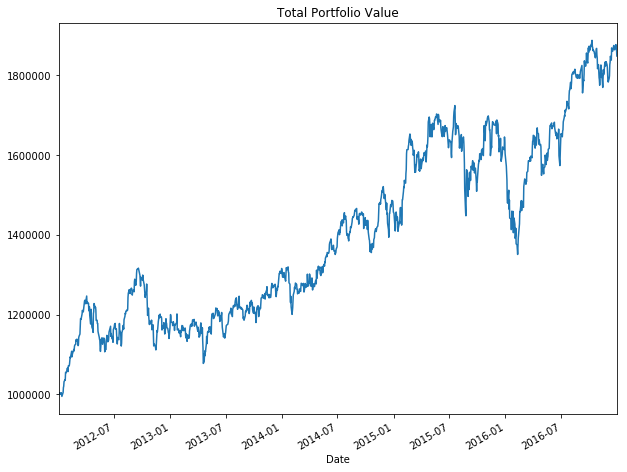

In [20]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

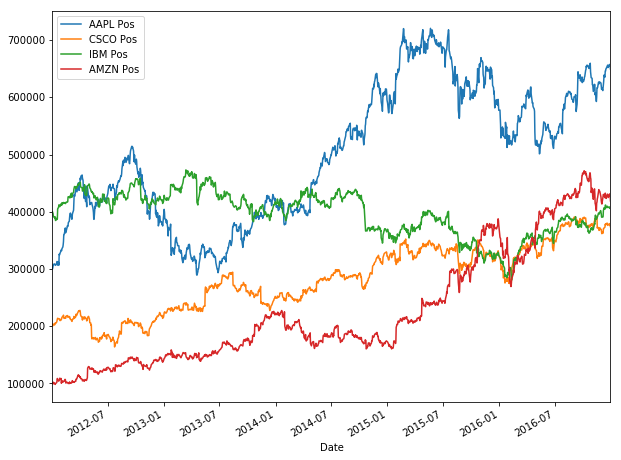

In [21]:
portfolio_val.drop('Total Pos',axis=1).plot(figsize=(10,8))

### Portfolio Statistics

In [22]:
portfolio_val.head()

,AAPL Pos,CSCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [23]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [24]:
portfolio_val.head()

,AAPL Pos,CSCO Pos,IBM Pos,AMZN Pos,Total Pos,Daily Return
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487


In [25]:
portfolio_val['Daily Return'].mean()

0.000544233071621529

In [26]:
portfolio_val['Daily Return'].std()

0.01056828776916188

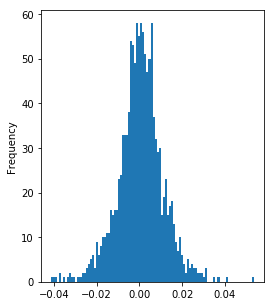

In [27]:
portfolio_val['Daily Return'].plot(kind='hist',bins=100,figsize=(4,5))

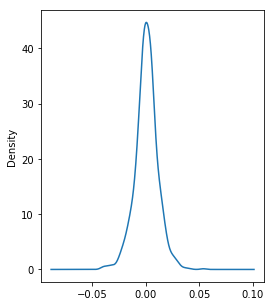

In [28]:
portfolio_val['Daily Return'].plot(kind='kde',figsize=(4,5))

In [29]:
cumulative_return = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] - 1)

In [31]:
cumulative_return
# 84.74% Return

84.742851816656398

In [32]:
portfolio_val['Total Pos'][-1]

1847428.5181665639

In [33]:
SR = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()

In [34]:
SR

0.05149680662648057

^ Our Sharpe Ratio assuming RF = 0 

Since our sampling rate is daily, we need to annualize this value.

In [36]:
ASR = (252**0.5) * SR

In [37]:
ASR

0.817486461885904

Generally looking for a Sharpe Ratio greater than 1... Can you get one higher than 3?

### Portfolio Optimization

Let's try to guess and check a bunch of portfolio allocations and see which has the best Sharpe Ratio... AKA Monte Carlo Simulation.

Let's use SciPy's built-in optimization algorithms to calculate the optimal weight allocation for our portfolio (optimized by Sharpe Ratio)...

### Monte Carlo Approach

In [40]:
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

In [41]:
stocks = pd.concat([aapl,cisco,ibm,amzn],axis=1)
stocks.columns = ['aapl','cisco','ibm','amzn']

In [42]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,52.848787,15.617341,159.151010,179.03
2012-01-04,53.132802,15.919125,158.501763,177.51
2012-01-05,53.722681,15.860445,157.750003,177.61
2012-01-06,54.284287,15.801764,155.938944,182.61
2012-01-09,54.198183,15.902359,155.127385,178.56


In [43]:
stocks.pct_change(1).mean()

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [44]:
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


In [45]:
stocks.pct_change(1).head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


In [47]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


Notice the slight differences in logarithmic and arithmetic

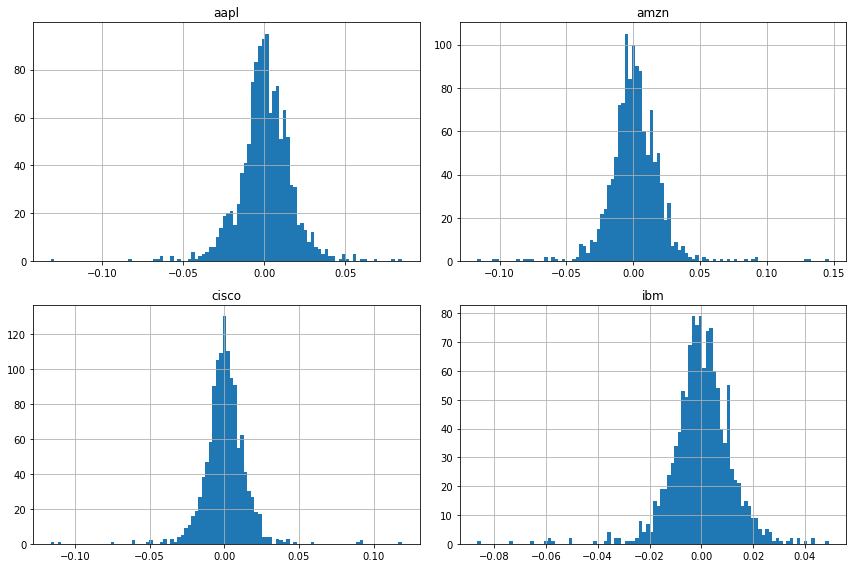

In [48]:
log_ret.hist(bins=100,figsize=(12,8))
plt.tight_layout()

In [49]:
log_ret.mean()

aapl     0.000614
cisco    0.000497
ibm      0.000011
amzn     0.001139
dtype: float64

In [52]:
# Covariance of the columns
log_ret.cov() * 252

,aapl,cisco,ibm,amzn
aapl,0.068326,0.017854,0.014464,0.018986
cisco,0.017854,0.051381,0.018029,0.019956
ibm,0.014464,0.018029,0.035203,0.014939
amzn,0.018986,0.019956,0.014939,0.094470


In [61]:
# Get the same random numbers every time...
np.random.seed(101)

print(stocks.columns)

weights = np.array(np.random.random(4))

print("\nRandom Weights")
print(weights)
# Note that these weights do not sum to 1

print("\nRebalance")
weights = weights/np.sum(weights)
print(weights)

# Expected Return
print("\nExpected Portfolio Return")
exp_ret = np.sum( (log_ret.mean() * weights) * 252) # Expected logarithmic return over 252 days.
print(exp_ret)

# Expected Volatility
print("\nExpected Volatility")
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
print(exp_vol)
# We're using Linear Algebra here to take advantage of how Numpy works.

# Sharpe Ratio
print("\nSharpe Ratio")
SR = exp_ret/exp_vol
print(SR)

Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')

Random Weights
[ 0.51639863  0.57066759  0.02847423  0.17152166]

Rebalance
[ 0.40122278  0.44338777  0.02212343  0.13326603]

Expected Portfolio Return
0.15599272049632512

Expected Volatility
0.185026495659

Sharpe Ratio
0.843083148393


In [62]:
# Get the same random numbers every time...
np.random.seed(101)

num_ports = 5000
all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):
    
    # Weights
    weights = np.array(np.random.random(4))
    weights = weights/np.sum(weights)

    # Save Weights
    all_weights[ind,:] = weights
    
    # Expected Return
    ret_arr[ind] = np.sum( (log_ret.mean() * weights) * 252) # Expected logarithmic return over 252 days.

    # Expected Volatility
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [63]:
sharpe_arr.max()

1.0303260551271305

In [64]:
sharpe_arr.argmax()

1420

In [65]:
all_weights[1420,:]

array([ 0.26188068,  0.20759516,  0.00110226,  0.5294219 ])

This is the optimal allocation out of all these 5,000 allocations we just generated.

In [69]:
max_sr_ret = ret_arr[1420]
max_sr_vol = vol_arr[1420]

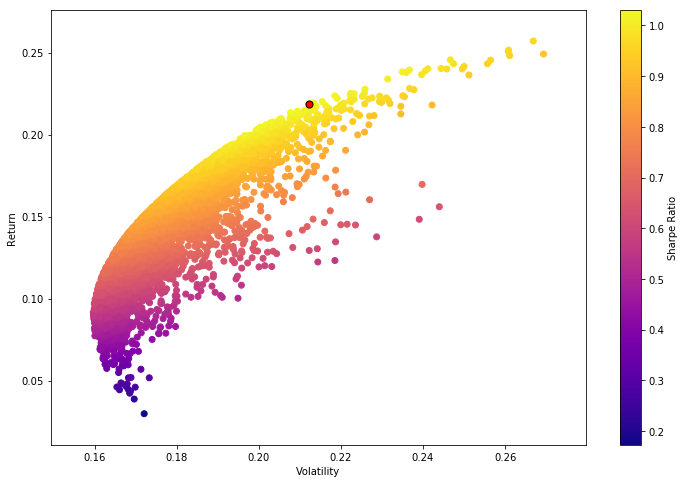

In [71]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black');

### Optimization Approach

In [72]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [73]:
from scipy.optimize import minimize

In [74]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    In general, the optimization problems are of the form::
    
        minimize f(x) subject to
    
        g_i(x) >= 0,  i = 1,...,m
        h_j(x)  = 0,  j = 1,...,p
    
    where x is a vector of one or more variables.
    ``g_i(x)`` are the inequality constraints.
    ``h_j(x)`` are the equality constrains.
    
    Optionally, the lower and upper bounds for each element in x can also be
    specified using the `bounds` argument.
    
    Parameters
    ----------
    fun : callable
        Objective function.
    x0 : ndarray
        Initial guess.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (Jacobian, Hessian).
    method : str or callable, op

In [75]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1 # We want to minimize the negative sharpe ratio

In [76]:
# Constraint
def check_sum(weights):
    # Return 0 if the sum of the weights is 1
    return np.sum(weights) - 1

In [77]:
cons = ({'type':'eq','fun':check_sum})

In [78]:
bounds = ((0,1),(0,1),(0,1),(0,1))

In [79]:
init_guess = [0.25,0.25,0.25,0.25]

In [80]:
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [81]:
opt_results

     fun: -1.0307168703348235
     jac: array([  5.64306974e-05,   4.18573618e-05,   3.39921728e-01,
        -4.45097685e-05])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([  2.66289765e-01,   2.04189835e-01,   1.48068135e-16,
         5.29520400e-01])

In [84]:
opt_results.x
# This is the optimal allocation

array([  2.66289765e-01,   2.04189835e-01,   1.48068135e-16,
         5.29520400e-01])

In [85]:
get_ret_vol_sr(opt_results.x)
# This is the returns, volatility, and sharpe ratio of that portfolio

array([ 0.21885915,  0.21233683,  1.03071687])

In [86]:
frontier_y = np.linspace(0,0.3,100)

In [87]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [88]:
frontier_volatility = []

for possible_return in frontier_y:
    cons = ({'type':'eq','fun':check_sum},{'type':'eq','fun':lambda w: get_ret_vol_sr(w)[0]-possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

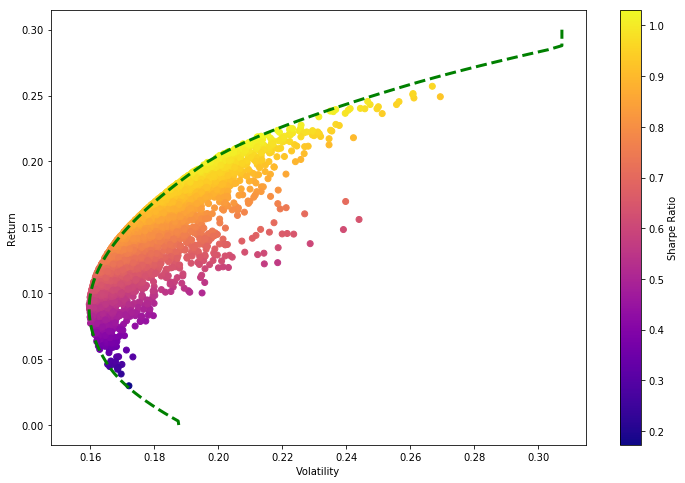

In [89]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)

For each level of volatility, what is the best return that we can get?